In [3]:
from hybridpipe import mlpipe, mlht

import pandas as pd
import seaborn as sns

df_read = pd.read_csv('mushrooms.csv')

In [4]:
sns.__version__

'0.13.2'

In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
mushroom = fetch_ucirepo(id=73) 

X = mushroom.data.features 
y = mushroom.data.targets 

df = pd.concat([X, y], axis=1)

In [6]:
# len(X['veil-type'].value_counts())

In [7]:
pipe = mlpipe(df=df_read,target_column='class',test_size=0.2,random_state=1,display_analytics=True)

Dropped features with >=25% missing values: []
8124 number of instances remaining.
Training Logistic Regression...
Training SVM...
Training KNN...
Training Decision Tree...
Training Random Forest...
Training Extra Trees...
Training Gradient Boosting...
Training AdaBoost...


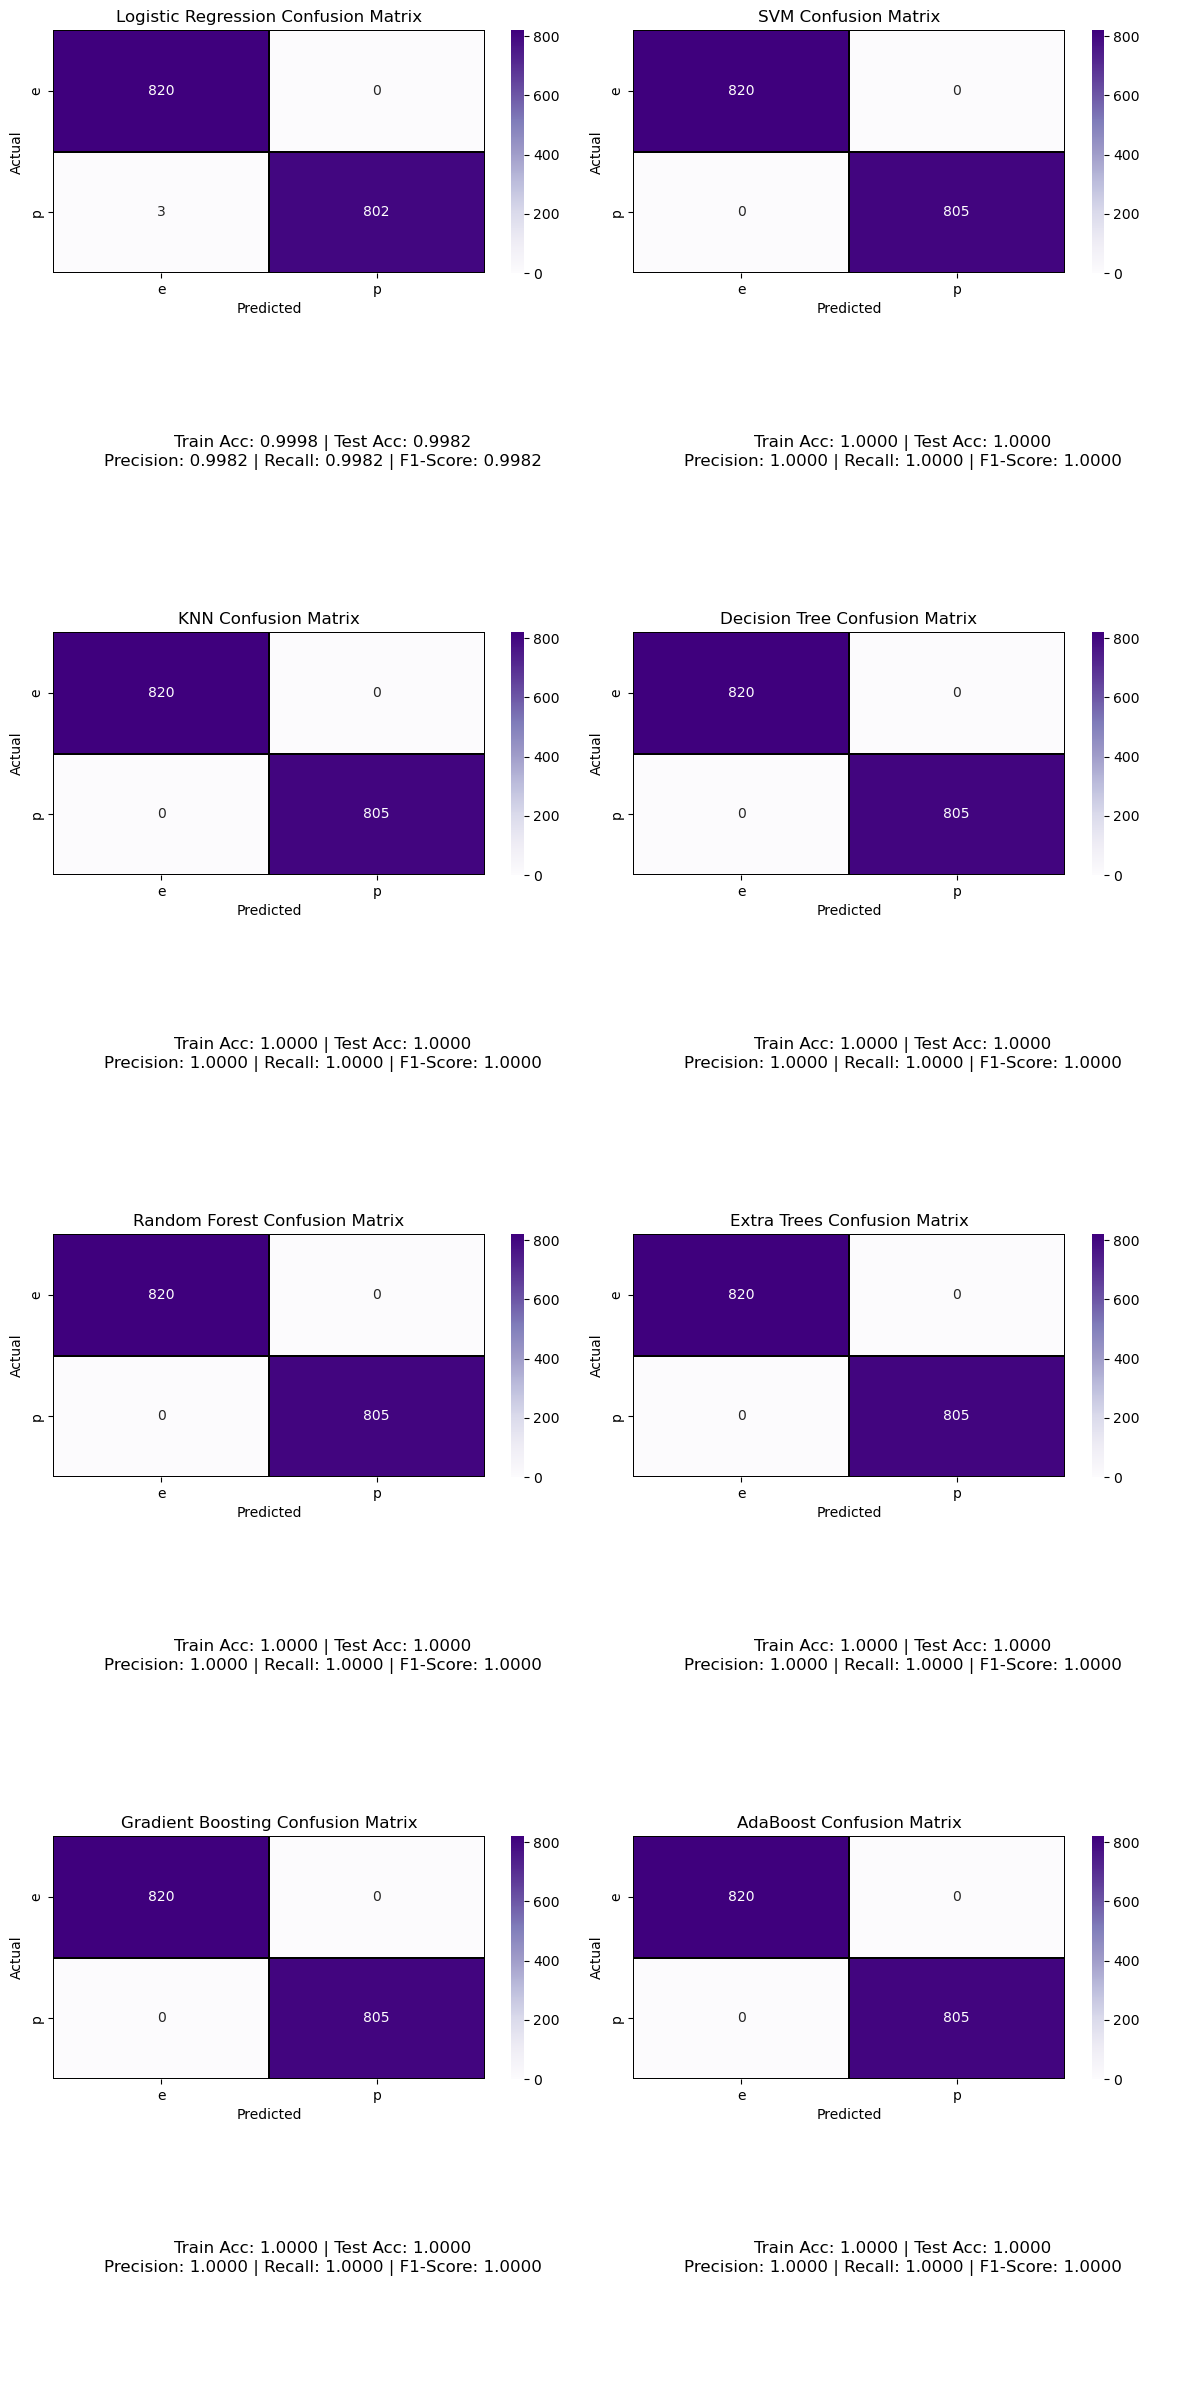

The best model is SVM with a test accuracy of 1.0000.


In [8]:
pipe.run_pipeline(drop_max_na_col_in=True,drop_threshold_in=0.25)

In [15]:
pipe.get_feature_importance()

The model SVC() does not support feature importance.


In [17]:
my_model=pipe.user_model_return()

The models trained are: 

0. Logistic Regression
1. SVM
2. KNN
3. Decision Tree
4. Random Forest
5. Extra Trees
6. Gradient Boosting
7. AdaBoost


Which model would you like? 3


Press 1 to save fig 1


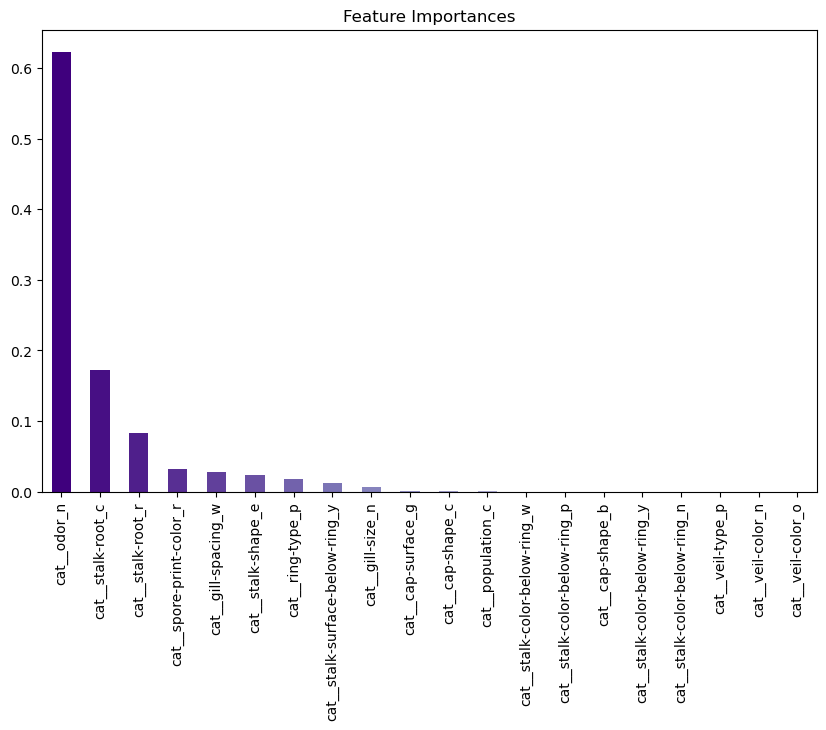

Press 1 to save fig 1


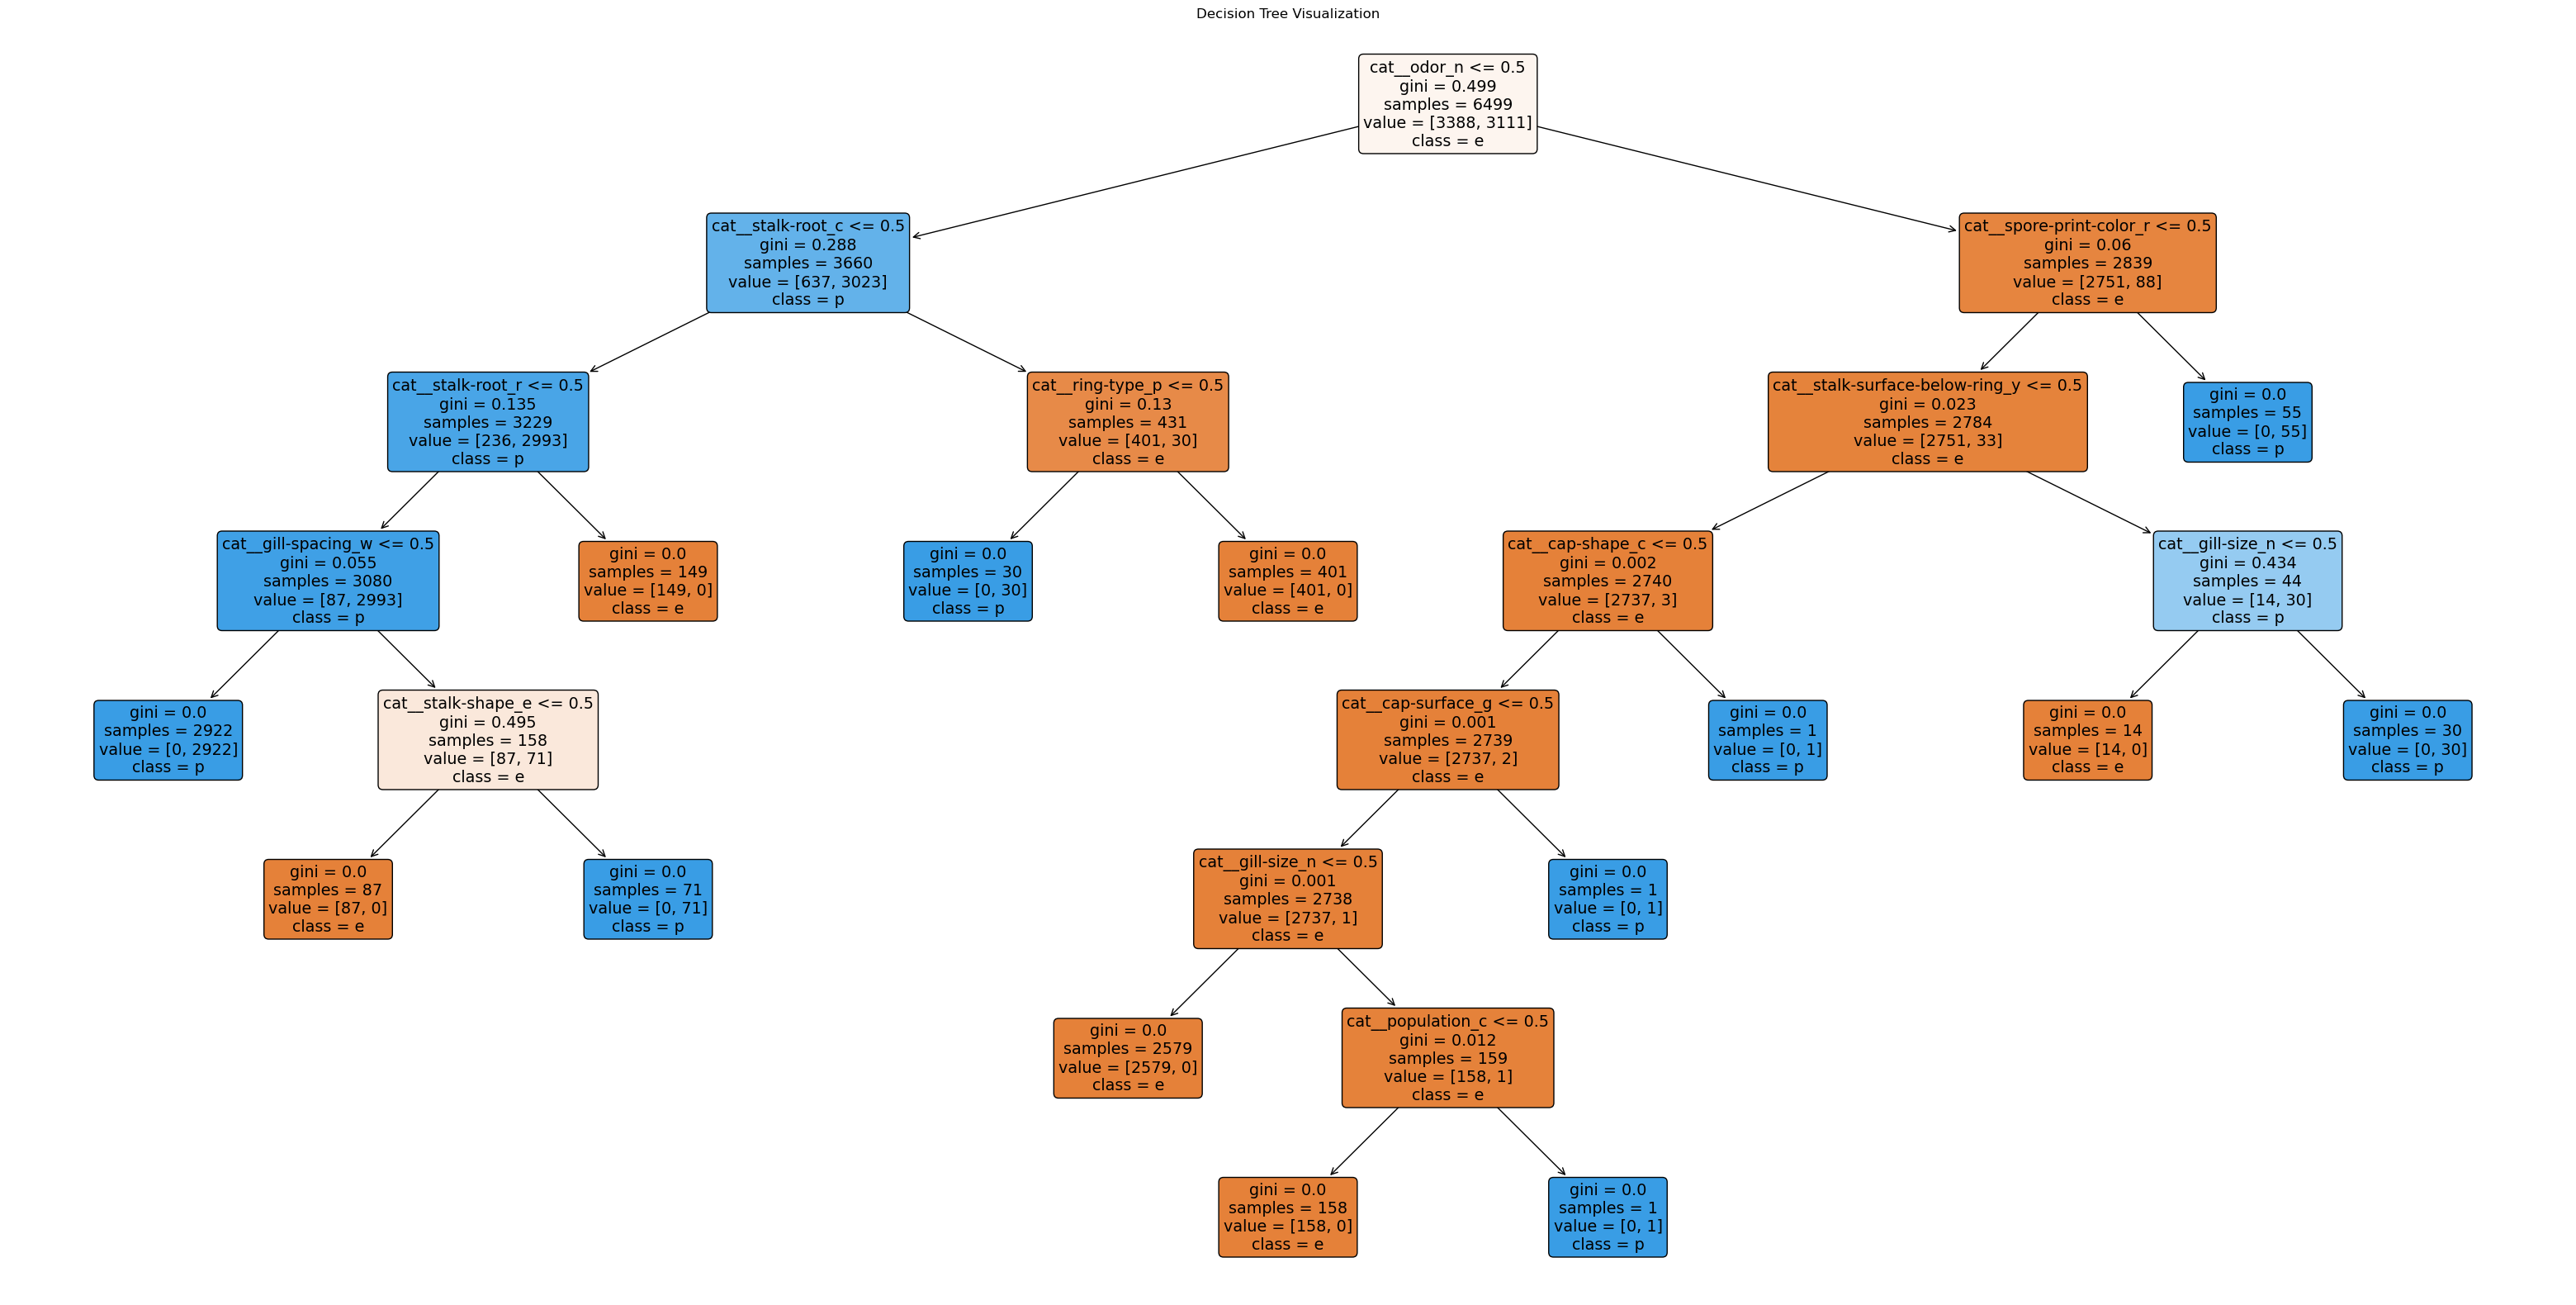

In [19]:
pipe.get_feature_importance()

pipe.visualize_decision_tree()

In [ ]:
ht = mlht(model=my_model, pipeline=pipe, cores=2)

In [ ]:
ht.run_tuning()

In [ ]:
tm = ht.tuned_model

In [ ]:
tm

In [ ]:
pipe.X_train

In [ ]:
x_train_sparse = pd.DataFrame.sparse.from_spmatrix(pipe.X_train)
x_train_sparse

In [ ]:
df_read.info()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

# Example Series
data = df_read['class']

# Count occurrences of 'e' and 'p'
value_counts = data.value_counts()

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Create custom gradient color for each bar
colors = sns.color_palette("Purples", len(value_counts))

bars = ax.bar(value_counts.index, value_counts.values)

# Apply gradient to each bar
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

# Adding labels and title
ax.set_title('Target class balance')
ax.set_xlabel('Target')
ax.set_ylabel('Instances')

# Display the plot
plt.show()